# **Análisis de Metodos de Optimización de un Modelo**

## Manejo de datos

**1. Importacion de librerías**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import optimizers

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.metrics import rmse

**2. Lectura del dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("Dataset para el análisis")
df = df.drop(df.columns[0], axis = 1)
df.head(1)

**3. Tratamiento de datos de entrada y salida**

**Datos de entrada**

In [ ]:
assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
df.dropna(inplace=True)
indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
df = df[indices_to_keep].astype(np.float64)

In [ ]:
df[['Datos de entrada']]

In [ ]:
X = df
X.info()

**Datos de salida**

In [ ]:
Y = df.iloc[:, [12, 13]]
Y.tail(1)

**4. Escalado de la entrada y salida de los datos mediante StandarScaler**

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[-0.98682915, -1.61723722, -1.03665625, ..., -0.55701562,
        -0.44890419, -0.4574853 ],
       [-0.98682915, -1.61723722, -1.03665625, ..., -0.58046932,
        -0.43063942, -0.4574853 ],
       [-0.98682915, -1.61723722, -1.03665625, ..., -0.47347637,
        -0.76375376, -0.4574853 ],
       ...,
       [ 1.01334663,  1.06798685,  0.96463991, ..., -0.10967689,
         0.31241548,  2.9260415 ],
       [ 1.01334663,  1.06798685,  0.96463991, ..., -0.2008756 ,
         0.34912955,  2.92728819],
       [ 1.01334663,  1.06798685,  0.96463991, ..., -0.22824151,
         0.42503138,  2.92568637]])

In [ ]:
scalerOut = StandardScaler()
scalerOut.fit(Y)
Y_scaled = scalerOut.transform(Y)
Y_scaled

array([[ 1.45510994,  3.19284768],
       [-0.17468378,  3.29327073],
       [-1.51848735,  2.8960268 ],
       ...,
       [-0.50211603, -0.99106747],
       [-0.50105165, -1.01263056],
       [-0.45127687, -1.05461837]])

**5. Split de los datos**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y_scaled, test_size= 0.05, random_state= 2)

In [ ]:
X_train.shape

(1003, 19)

In [ ]:
X_test.shape

(53, 19)

# Funciones de Implementación de los gráficos


In [ ]:
def ParamsVisual_RMSE_Trainig(history_1, history_2, history_3, history_4, history_5, x_limit= None, y_limit= None):
    fig, axL = plt.subplots(figsize=[17, 10],dpi=90)

    axL.plot(history_1.history['root_mean_squared_error'],color='blue', label="SGD")
    axL.plot(history_2.history['root_mean_squared_error'],color='red', label="Nadam")
    axL.plot(history_3.history['root_mean_squared_error'],color='green', label="Adam")
    axL.plot(history_4.history['root_mean_squared_error'],color='black', label="Adamax")
    axL.plot(history_5.history['root_mean_squared_error'],color='orange', label="RMSprop")

    axL.set_title('RMSE vs Epoch')
    axL.set_ylabel('RMSE')
    axL.set_xlabel('Epoch')
    axL.legend(loc='upper right')
    axL.grid(axis='x', color='0.95')
    axL.legend(title='RMSE')

    axL.set_xlim(right=x_limit, left=0)
    axL.set_ylim(top=y_limit, bottom=0)

 
    plt.show()

In [ ]:
def ParamsVisual_RMSE_Test(history_1, history_2, history_3, history_4, history_5, x_limit= None, y_limit= None):
    
    fig, axL = plt.subplots(figsize=[17, 10],dpi=90)
    axL.plot(history_1.history['val_root_mean_squared_error'],'--',color='blue', label="SGD")
    axL.plot(history_2.history['val_root_mean_squared_error'],'--',color='red', label="Nadam")
    axL.plot(history_3.history['val_root_mean_squared_error'],'--',color='green', label="Adam")
    axL.plot(history_4.history['val_root_mean_squared_error'],'--',color='black', label="Adamax")
    axL.plot(history_5.history['val_root_mean_squared_error'],'--',color='orange', label="RMSprop")

    axL.set_title('RMSE vs Epoch')
    axL.set_ylabel('RMSE')
    axL.set_xlabel('Epoch')
    axL.legend(loc='upper right')
    axL.grid(axis='x', color='0.95')
    axL.legend(title='RMSE')

    axL.set_xlim(right=x_limit, left=0)
    axL.set_ylim(top=y_limit, bottom=0)

    plt.show()


In [ ]:
def ParamsVisual_Loss_Training(history_1, history_2, history_3, history_4, history_5, x_limit= None, y_limit= None):
    
    fig, axL = plt.subplots(figsize=[17, 10],dpi=90)
    axL.plot(history_1.history['loss'],color='blue', label="SGD")
    axL.plot(history_2.history['loss'],color='red', label="Nadam")
    axL.plot(history_3.history['loss'],color='green', label="Adam")
    axL.plot(history_4.history['loss'],color='black', label="Adamax")
    axL.plot(history_5.history['loss'],color='orange', label="RMSprop")

    axL.set_title('Loss vs Epoch')
    axL.set_ylabel('Loss')
    axL.set_xlabel('Epoch')
    axL.legend(loc='upper right')
    axL.grid(axis='x', color='0.95')
    axL.legend(title='Loss')

    axL.set_xlim(right=x_limit, left=0)
    axL.set_ylim(top=y_limit, bottom=0)

    plt.show()

In [ ]:
def ParamsVisual_Loss_Test(history_1, history_2, history_3, history_4, history_5, x_limit= None, y_limit= None):
    
    fig, axL = plt.subplots(figsize=[17, 10],dpi=90)
    axL.plot(history_1.history['val_loss'],'--',color='blue', label="SGD")
    axL.plot(history_2.history['val_loss'],'--',color='red', label="Nadam")
    axL.plot(history_3.history['val_loss'],'--',color='green', label="Adam")
    axL.plot(history_4.history['val_loss'],'--',color='black', label="Adamax")
    axL.plot(history_5.history['val_loss'],'--',color='orange', label="RMSprop")

    axL.set_title('Loss vs Epoch')
    axL.set_ylabel('Loss')
    axL.set_xlabel('Epoch')
    axL.legend(loc='upper right')
    axL.grid(axis='x', color='0.95')
    axL.legend(title='Loss')

    axL.set_xlim(right=x_limit, left=0)
    axL.set_ylim(top=y_limit, bottom=0)

    plt.show()

# Descripción del Modelo de Ejemplo


##**Optimizador SGD**

In [ ]:
optimizerf_1 = tf.keras.optimizers.SGD(learning_rate=0.001)

**1. Desarrollo de un Early stopping para evitar el overfitting**

In [ ]:
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    min_delta=0,
    patience=250,
    verbose=1,
    mode='auto',
    restore_best_weights=True
)

**2. Estructura del modelo (En este caso es un modelo de 5 Capas con activacion Relu)**

In [ ]:
model_1_SGD = models.Sequential()
model_1_SGD.add(layers.Dense(256, activation = 'relu'))
model_1_SGD.add(layers.Dense(512, activation = 'relu'))
model_1_SGD.add(layers.Dense(1024, activation = 'relu'))
model_1_SGD.add(layers.Dense(2048, activation = 'relu'))
model_1_SGD.add(layers.Dense(2))

In [ ]:
model_1_SGD.compile(optimizer = optimizerf_1, loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])

**3. Entrenamiento del Modelo**

In [ ]:
trained_model_1_SGD = model_1_SGD.fit(
    x= X_train, 
    y= Y_train, 
    epochs = 5000,
    callbacks= [early_stopping],
    validation_split=0.14,
    )

Se han truncado las últimas 5000 líneas del flujo de salida.
27/27 [==============================] - 0s 6ms/step - loss: 0.0025 - root_mean_squared_error: 0.0500 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0994
Epoch 2502/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0025 - root_mean_squared_error: 0.0500 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0994
Epoch 2503/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0025 - root_mean_squared_error: 0.0500 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0994
Epoch 2504/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0025 - root_mean_squared_error: 0.0500 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0993
Epoch 2505/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0025 - root_mean_squared_error: 0.0500 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0994
Epoch 2506/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0

In [ ]:
y_pred_SGD = model_1_SGD.predict(X_test)
y_test_SGD = Y_test

2/2 [==============================] - 0s 5ms/step


##**Optimizador Nadam**

In [ ]:
optimizerf_2 = tf.keras.optimizers.Nadam(learning_rate=0.001)

**1. Desarrollo de un Early stopping para evitar el overfitting**

In [ ]:
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    min_delta=0,
    patience=250,
    verbose=1,
    mode='auto',
    restore_best_weights=True
)

**2. Estructura del modelo (En este caso es un modelo de 5 Capas con activacion Relu)**

In [ ]:
model_1_Nadam = models.Sequential()
model_1_Nadam.add(layers.Dense(256, activation = 'relu'))
model_1_Nadam.add(layers.Dense(512, activation = 'relu'))
model_1_Nadam.add(layers.Dense(1024, activation = 'relu'))
model_1_Nadam.add(layers.Dense(2048, activation = 'relu'))
model_1_Nadam.add(layers.Dense(2))

In [ ]:
model_1_Nadam.compile(optimizer = optimizerf_2, loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])

**3. Entrenamiento del Modelo**

In [ ]:
trained_model_1_Nadam = model_1_Nadam.fit(
    x= X_train, 
    y= Y_train, 
    epochs = 5000,
    callbacks= [early_stopping],
    validation_split=0.14,
    )

Epoch 1/5000
27/27 [==============================] - 2s 17ms/step - loss: 0.3701 - root_mean_squared_error: 0.6084 - val_loss: 0.2116 - val_root_mean_squared_error: 0.4600
Epoch 2/5000
27/27 [==============================] - 0s 9ms/step - loss: 0.1017 - root_mean_squared_error: 0.3189 - val_loss: 0.0877 - val_root_mean_squared_error: 0.2961
Epoch 3/5000
27/27 [==============================] - 0s 9ms/step - loss: 0.0833 - root_mean_squared_error: 0.2887 - val_loss: 0.0718 - val_root_mean_squared_error: 0.2679
Epoch 4/5000
27/27 [==============================] - 0s 9ms/step - loss: 0.0639 - root_mean_squared_error: 0.2528 - val_loss: 0.0603 - val_root_mean_squared_error: 0.2455
Epoch 5/5000
27/27 [==============================] - 0s 9ms/step - loss: 0.0475 - root_mean_squared_error: 0.2180 - val_loss: 0.0216 - val_root_mean_squared_error: 0.1469
Epoch 6/5000
27/27 [==============================] - 0s 10ms/step - loss: 0.0202 - root_mean_squared_error: 0.1423 - val_loss: 0.0186 - va

In [ ]:
y_pred_Nadam = model_1_Nadam.predict(X_test)
y_test_Nadam = Y_test

2/2 [==============================] - 0s 5ms/step


##**Optimizador Adam**

In [ ]:
optimizerf_3 = tf.keras.optimizers.Adam(learning_rate=0.001)

**1. Desarrollo de un Early stopping para evitar el overfitting**

In [ ]:
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    min_delta=0,
    patience=250,
    verbose=1,
    mode='auto',
    restore_best_weights=True
)

**2. Estructura del modelo (En este caso es un modelo de 5 Capas con activacion Relu)**

In [ ]:
model_1_Adam = models.Sequential()
model_1_Adam.add(layers.Dense(256, activation = 'relu'))
model_1_Adam.add(layers.Dense(512, activation = 'relu'))
model_1_Adam.add(layers.Dense(1024, activation = 'relu'))
model_1_Adam.add(layers.Dense(2048, activation = 'relu'))
model_1_Adam.add(layers.Dense(2))

In [ ]:
model_1_Adam.compile(optimizer = optimizerf_3, loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])

**3. Entrenamiento del Modelo**

In [ ]:
trained_model_1_Adam = model_1_Adam.fit(
    x= X_train, 
    y= Y_train, 
    epochs = 5000,
    callbacks= [early_stopping],
    validation_split=0.14,
    )

Epoch 1/5000
27/27 [==============================] - 1s 13ms/step - loss: 0.2936 - root_mean_squared_error: 0.5419 - val_loss: 0.0839 - val_root_mean_squared_error: 0.2897
Epoch 2/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.1490 - root_mean_squared_error: 0.3860 - val_loss: 0.0816 - val_root_mean_squared_error: 0.2857
Epoch 3/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.1033 - root_mean_squared_error: 0.3215 - val_loss: 0.0376 - val_root_mean_squared_error: 0.1940
Epoch 4/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0247 - root_mean_squared_error: 0.1572 - val_loss: 0.0250 - val_root_mean_squared_error: 0.1582
Epoch 5/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0165 - root_mean_squared_error: 0.1284 - val_loss: 0.0189 - val_root_mean_squared_error: 0.1376
Epoch 6/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0120 - root_mean_squared_error: 0.1095 - val_loss: 0.0154 - val

In [ ]:
y_pred_Adam = model_1_Adam.predict(X_test)
y_test_Adam = Y_test

2/2 [==============================] - 0s 5ms/step


##**Optimizador Adamax**

In [ ]:
optimizerf_4 = tf.keras.optimizers.Adamax(learning_rate=0.001)

**1. Desarrollo de un Early stopping para evitar el overfitting**

In [ ]:
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    min_delta=0,
    patience=250,
    verbose=1,
    mode='auto',
    restore_best_weights=True
)

**2. Estructura del modelo (En este caso es un modelo de 5 Capas con activacion Relu)**

In [ ]:
model_1_Adamax = models.Sequential()
model_1_Adamax.add(layers.Dense(256, activation = 'relu'))
model_1_Adamax.add(layers.Dense(512, activation = 'relu'))
model_1_Adamax.add(layers.Dense(1024, activation = 'relu'))
model_1_Adamax.add(layers.Dense(2048, activation = 'relu'))
model_1_Adamax.add(layers.Dense(2))

In [ ]:
model_1_Adamax.compile(optimizer = optimizerf_4, loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])

**3. Entrenamiento del Modelo**

In [ ]:
trained_model_1_Adamax = model_1_Adamax.fit(
    x= X_train, 
    y= Y_train, 
    epochs = 5000,
    callbacks= [early_stopping],
    validation_split=0.14,
    )

Epoch 1/5000
27/27 [==============================] - 1s 13ms/step - loss: 0.3315 - root_mean_squared_error: 0.5758 - val_loss: 0.1182 - val_root_mean_squared_error: 0.3439
Epoch 2/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0797 - root_mean_squared_error: 0.2824 - val_loss: 0.0571 - val_root_mean_squared_error: 0.2389
Epoch 3/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0436 - root_mean_squared_error: 0.2088 - val_loss: 0.0421 - val_root_mean_squared_error: 0.2052
Epoch 4/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0218 - root_mean_squared_error: 0.1476 - val_loss: 0.0311 - val_root_mean_squared_error: 0.1765
Epoch 5/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0143 - root_mean_squared_error: 0.1194 - val_loss: 0.0244 - val_root_mean_squared_error: 0.1564
Epoch 6/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0115 - root_mean_squared_error: 0.1071 - val_loss: 0.0221 - val

In [ ]:
y_pred_Adamax = model_1_Adamax.predict(X_test)
y_test_Adamax = Y_test

2/2 [==============================] - 0s 6ms/step


##**Optimizador RMSprop**

In [ ]:
optimizerf_5 = tf.keras.optimizers.RMSprop(learning_rate=0.001)

**1. Desarrollo de un Early stopping para evitar el overfitting**

In [ ]:
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    min_delta=0,
    patience=250,
    verbose=1,
    mode='auto',
    restore_best_weights=True
)

**2. Estructura del modelo (En este caso es un modelo de 5 Capas con activacion Relu)**

In [ ]:
model_1_RMSprop = models.Sequential()
model_1_RMSprop.add(layers.Dense(256, activation = 'relu'))
model_1_RMSprop.add(layers.Dense(512, activation = 'relu'))
model_1_RMSprop.add(layers.Dense(1024, activation = 'relu'))
model_1_RMSprop.add(layers.Dense(2048, activation = 'relu'))
model_1_RMSprop.add(layers.Dense(2))

In [ ]:
model_1_RMSprop.compile(optimizer = optimizerf_5, loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])

**3. Entrenamiento del Modelo**

In [ ]:
trained_model_1_RMSprop = model_1_RMSprop.fit(
    x= X_train, 
    y= Y_train, 
    epochs = 5000,
    callbacks= [early_stopping],
    validation_split=0.14,
    )

Epoch 1/5000
27/27 [==============================] - 1s 11ms/step - loss: 0.6370 - root_mean_squared_error: 0.7981 - val_loss: 0.1238 - val_root_mean_squared_error: 0.3518
Epoch 2/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.1594 - root_mean_squared_error: 0.3992 - val_loss: 0.1030 - val_root_mean_squared_error: 0.3210
Epoch 3/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.1209 - root_mean_squared_error: 0.3477 - val_loss: 0.0889 - val_root_mean_squared_error: 0.2981
Epoch 4/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0927 - root_mean_squared_error: 0.3044 - val_loss: 0.0932 - val_root_mean_squared_error: 0.3052
Epoch 5/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0826 - root_mean_squared_error: 0.2875 - val_loss: 0.0364 - val_root_mean_squared_error: 0.1907
Epoch 6/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0714 - root_mean_squared_error: 0.2672 - val_loss: 0.0504 - val

In [ ]:
y_pred_RMSprop = model_1_RMSprop.predict(X_test)
y_test_RMSprop = Y_test

2/2 [==============================] - 0s 5ms/step


# Graficas de Análisis de los Metodos de Optimización

##**RMSE vs Epoch**

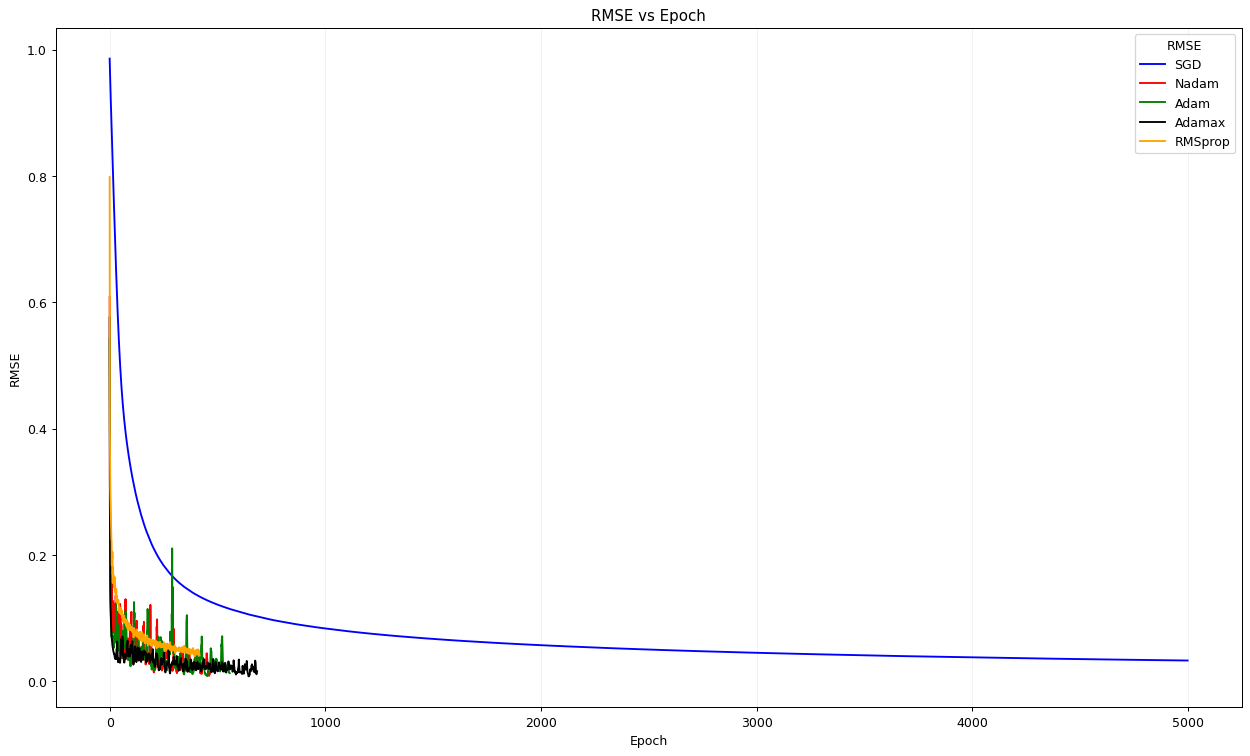

In [ ]:
ParamsVisual_RMSE_Trainig(trained_model_1_SGD, trained_model_1_Nadam, trained_model_1_Adam, trained_model_1_Adamax, trained_model_1_RMSprop)

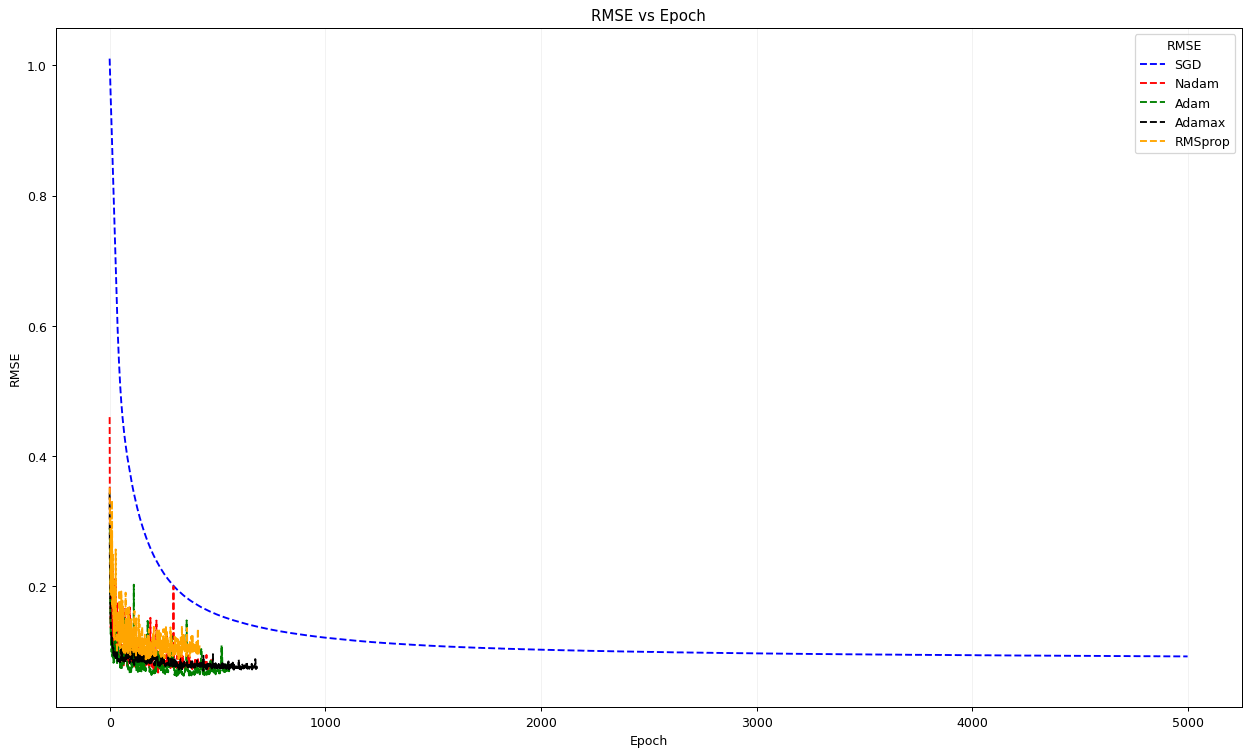

In [ ]:
ParamsVisual_RMSE_Test(trained_model_1_SGD, trained_model_1_Nadam, trained_model_1_Adam, trained_model_1_Adamax, trained_model_1_RMSprop)

##**Loss vs Epoch**

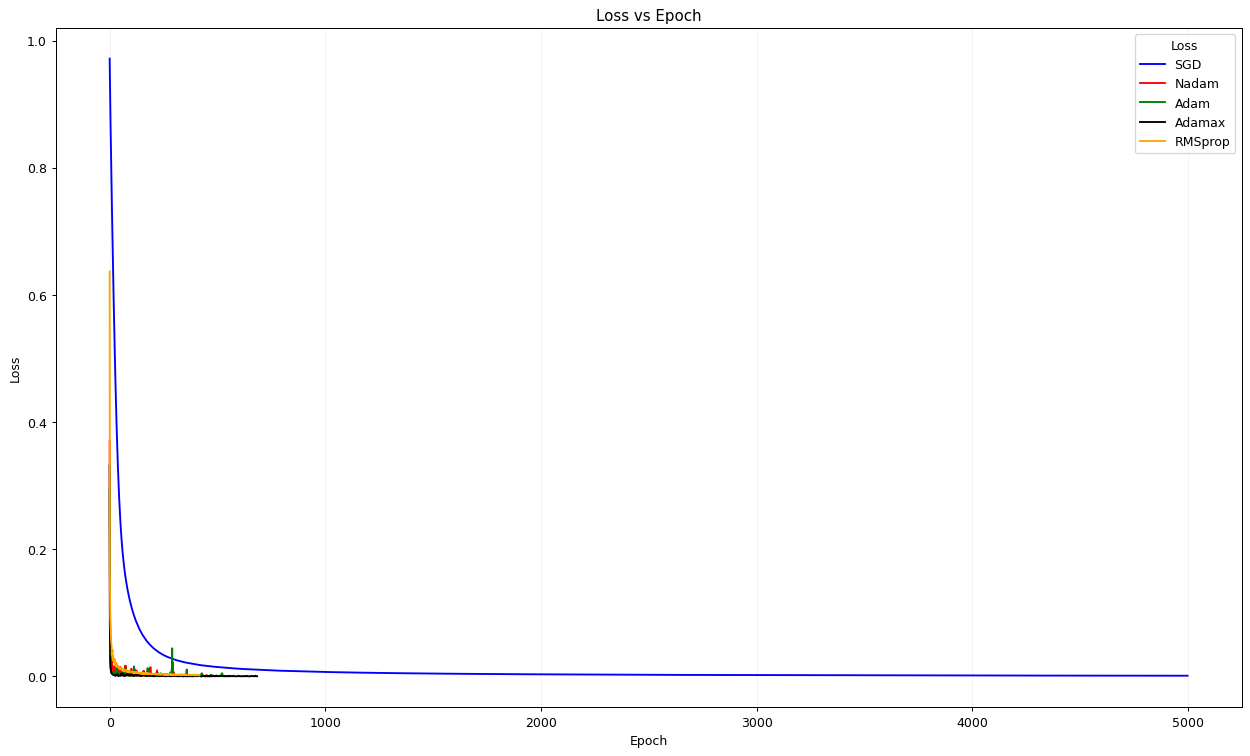

In [ ]:
ParamsVisual_Loss_Training(trained_model_1_SGD, trained_model_1_Nadam, trained_model_1_Adam, trained_model_1_Adamax, trained_model_1_RMSprop)

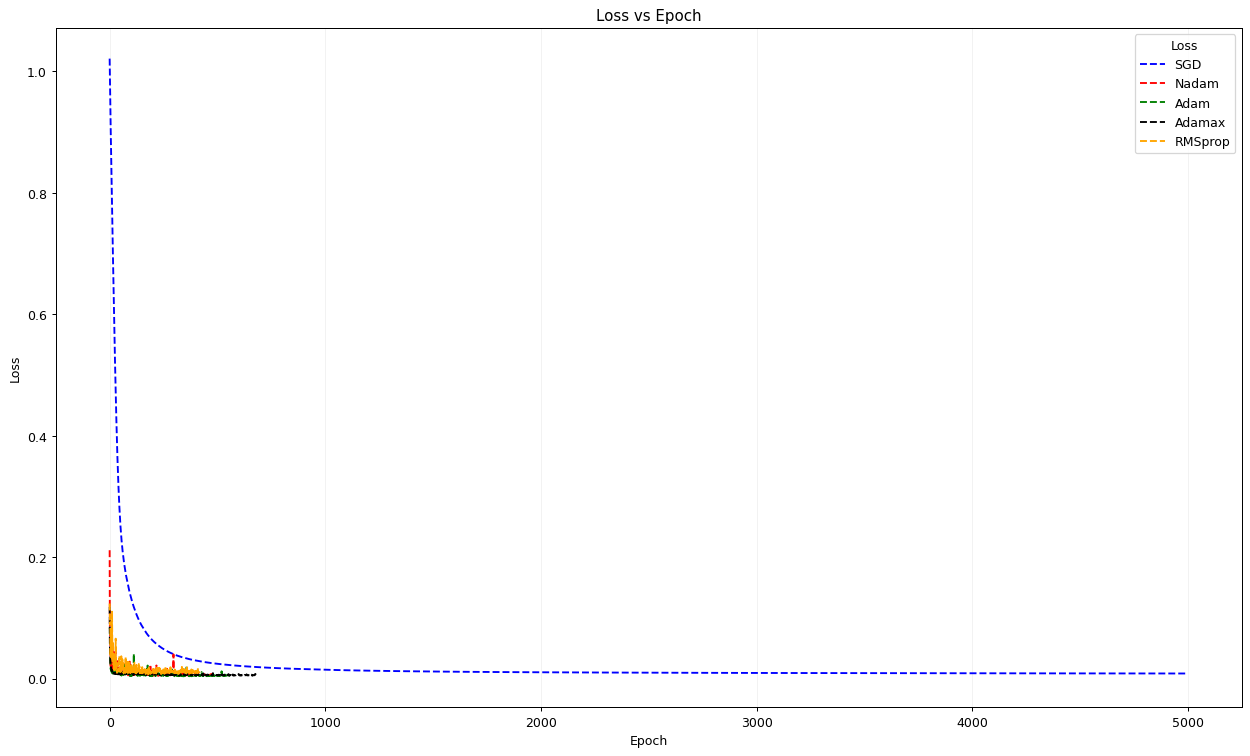

In [ ]:
ParamsVisual_Loss_Test(trained_model_1_SGD, trained_model_1_Nadam, trained_model_1_Adam, trained_model_1_Adamax, trained_model_1_RMSprop)